# General imports and benchmarking

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random

In [22]:
# Read input from the benchmark file
def read_input(file_path):
    with open(file_path, 'r') as file:
        num_objects = int(file.readline().strip())
        total_capacity = int(file.readline().strip())
        weights = [int(line.strip()) for line in file]

    return num_objects, total_capacity, weights

# Import the benchmark:
file_path = '/content/benchmark200.txt'
num_objects, total_capacity, weights = read_input(file_path)

# I. Combined Method - recursively inject heuristic's previous round performance
### ... Not fully functional yet (interesting idea **but** bad performance)

In [ ]:
class BinPacker:
  def __init__(self, items, bin_capacity):
    self.items = items
    self.bin_capacity = bin_capacity
    self.bins = []
    self.heuristics = [self.first_fit_decreasing, self.next_fit_decreasing, self.best_fit_decreasing]  # Low-level heuristics
    self.avg_performance = {h: 1 for h in self.heuristics}  # Track average performance
    self.exploration_param = 0.1  # Exploration probability
    self.iteration_count = 0  # Iteration counter for UCB

  def first_fit_decreasing(self, current_bin, item, bin_capacity):
    """
    First-Fit Decreasing (FFD) heuristic.
    """
    if sum(current_bin) + item <= bin_capacity:
      current_bin.append(item)
      return True
    return False

  def next_fit_decreasing(self, current_bin, item, bin_capacity):
    """
    Next-Fit Decreasing (NFD) heuristic.
    """
    if sum(current_bin) + item <= bin_capacity:
      current_bin.append(item)
      return True
    else:
      self.bins.append(current_bin)
      current_bin = [item]
    return True

  def best_fit_decreasing(self, current_bin, item, bin_capacity):
    """
    Best-Fit Decreasing (BFD) heuristic.
    """
    if sum(current_bin) + item <= bin_capacity:
      current_bin.append(item)
      return True

    best_bin = None
    best_remaining_space = -float('inf')
    for bin in self.bins:
      remaining_space = bin_capacity - sum(bin)
      if remaining_space >= item and remaining_space > best_remaining_space:
        best_bin = bin
        best_remaining_space = remaining_space

    if best_bin is not None:
      best_bin.append(item)
      return True
    else:
      self.bins.append(current_bin)
      current_bin = [item]
    return True

  def calculate_ucb(self, heuristic):
    """
    Calculate UCB (Upper Confidence Bound) for a heuristic.
    """
    if self.avg_performance[heuristic] == 0:
      # Avoid division by zero for new heuristics
      return float('inf')
    return self.avg_performance[heuristic] + random.random() * self.exploration_param * \
           math.sqrt(math.log(self.iteration_count) / self.avg_performance[heuristic])

  def select_heuristic(self):
    """
    Select a heuristic using UCB.
    """
    self.iteration_count += 1

    best_ucb = -float('inf')
    best_heuristic = None
    for heuristic in self.heuristics:
      ucb_value = self.calculate_ucb(heuristic)
      print(f"Heuristic : {heuristic.__name__} , performance: {ucb_value}")
      if ucb_value > best_ucb:
        best_ucb = ucb_value
        best_heuristic = heuristic
    return best_heuristic

  def pack_items(self):
    """
    Pack items into bins using the selected heuristic.
    """
    current_bin = []
    cpt = 0
    for item in self.items:
      cpt += 1
      selected_heuristic = self.select_heuristic()
      print(f"selected heuristic : {selected_heuristic.__name__}\n")
      if selected_heuristic(current_bin, item, self.bin_capacity):
        continue  # Item fits in current bin
      self.bins.append(current_bin)
      current_bin = [item]  # Start a new bin
    self.bins.append(current_bin)  # Add the last bin
    print("nb items packed = ",cpt)
    return self.bins

  def update_performance(self):
    """
    Update the average performance for each heuristic after packing.
    """
    num_bins = len(self.bins)
    for heuristic in self.heuristics:
      self.avg_performance[heuristic] = (self.avg_performance[heuristic] * (self.iteration_count - 1) + num_bins) / self.iteration_count


In [ ]:
# Example usage
items = [5,8,1,9,10,6,3,2]
bin_capacity =15

packer = BinPacker(items, bin_capacity)
packed_bins = packer.pack_items()

print("Packed items into", len(packed_bins), "bins")
for bin in packed_bins:
  print(bin)

packer.update_performance()  # Update performance after packing

Heuristic : first_fit_decreasing , performance: 1.0
Heuristic : next_fit_decreasing , performance: 1.0
Heuristic : best_fit_decreasing , performance: 1.0
selected heuristic : first_fit_decreasing

Heuristic : first_fit_decreasing , performance: 1.0123437819119687
Heuristic : next_fit_decreasing , performance: 1.0523040577889928
Heuristic : best_fit_decreasing , performance: 1.0732554369461291
selected heuristic : best_fit_decreasing

Heuristic : first_fit_decreasing , performance: 1.037593432096642
Heuristic : next_fit_decreasing , performance: 1.0037973631295896
Heuristic : best_fit_decreasing , performance: 1.0327598426491333
selected heuristic : first_fit_decreasing

Heuristic : first_fit_decreasing , performance: 1.1012681988176503
Heuristic : next_fit_decreasing , performance: 1.0651377307963494
Heuristic : best_fit_decreasing , performance: 1.0755898135740212
selected heuristic : first_fit_decreasing

Heuristic : first_fit_decreasing , performance: 1.0867636431110992
Heuristic : 

In [ ]:
class BinPacker2:
  avg_performance = {} # static variable shared among instances

  def __init__(self, items, bin_capacity):
    self.items = items
    self.bin_capacity = bin_capacity
    self.bins = []
    self.heuristics = ["FFD", "NFD", "BFD"]  # Low-level heuristics
    self.exploration_param = 0.3  # Exploration probability
    self.iteration_count = 0  # Iteration counter for UCB


  @staticmethod  # Static method to avoid needing an instance
  def initialize_performance():
    #print(BinPacker2.avg_performance)
    BinPacker2.avg_performance = {h: 1 for h in ["FFD", "NFD", "BFD"]}
    #print(BinPacker2.avg_performance)
    #print("done init \n")

  """ LOW LEVEL HEURISTICS IMPLIED FOR BPP """
  """ ____________________________________ """
  def first_fit_decreasing(self, current_bin, item, bin_capacity):
    """
    First-Fit Decreasing (FFD) heuristic.
    """
    if sum(current_bin) + item <= bin_capacity:
      current_bin.append(item)
      return True
    return False

  def next_fit_decreasing(self, current_bin, item, bin_capacity):
    """
    Next-Fit Decreasing (NFD) heuristic.
    """
    if sum(current_bin) + item <= bin_capacity:
      current_bin.append(item)
      return True
    else:
      self.bins.append(current_bin)
      current_bin = [item]
    return True

  def best_fit_decreasing(self, current_bin, item, bin_capacity):
    """
    Best-Fit Decreasing (BFD) heuristic.
    """
    if sum(current_bin) + item <= bin_capacity:
      current_bin.append(item)
      return True

    best_bin = None
    best_remaining_space = -float('inf')
    for bin in self.bins:
      remaining_space = bin_capacity - sum(bin)
      if remaining_space >= item and remaining_space > best_remaining_space:
        best_bin = bin
        best_remaining_space = remaining_space

    if best_bin is not None:
      best_bin.append(item)
      return True
    else:
      self.bins.append(current_bin)
      current_bin = [item]
    return True
  """ ____________________________________ """

  def calculate_ucb(self, heuristic):
    """
    Calculate UCB (Upper Confidence Bound) for a heuristic.
    """
    #print("calcul... init:", BinPacker2.avg_performance[heuristic])
    if BinPacker2.avg_performance[heuristic] == 0:
      # Avoid division by zero for new heuristics
      return float('inf')
    return BinPacker2.avg_performance[heuristic] + random.random() * self.exploration_param * \
           math.sqrt(math.log(self.iteration_count) / BinPacker2.avg_performance[heuristic])

  def select_heuristic(self):
    """
    Select a heuristic using UCB.
    """
    self.iteration_count += 1

    best_ucb = -float('inf')
    best_heuristic = None
    for heuristic in self.heuristics:
      ucb_value = self.calculate_ucb(heuristic)
      print(f"heuristic {heuristic} performance = {ucb_value}")
      if ucb_value > best_ucb:
        best_ucb = ucb_value
        best_heuristic = heuristic
    return best_heuristic

  def pack_items(self):
      """
      Pack items into bins using the selected heuristic.
      """
      current_bin = []
      for item in self.items:
          selected_heuristic = self.select_heuristic()
          if selected_heuristic == "FFD":
              if self.first_fit_decreasing(current_bin, item, self.bin_capacity):
                  continue
          elif selected_heuristic == "NFD":
              if self.next_fit_decreasing(current_bin, item, self.bin_capacity):
                  continue
          elif selected_heuristic == "BFD":
              if self.best_fit_decreasing(current_bin, item, self.bin_capacity):
                  continue
          # If none of the conditions match, start a new bin
          self.bins.append(current_bin)
          current_bin = [item]
      # Add the last bin
      self.bins.append(current_bin)
      return self.bins

  def update_performance(self):
    """
    Update the average performance for each heuristic after packing.
    """
    num_bins = len(self.bins)
    for heuristic in self.heuristics:
      BinPacker2.avg_performance[heuristic] = (BinPacker2.avg_performance[heuristic] * (self.iteration_count - 1) + num_bins) / self.iteration_count


In [ ]:
# Example usage - one round
items = [10, 5, 8, 7, 3, 2, 9]
bin_capacity = 15

# Call the initialization method before using BinPacker
BinPacker2.initialize_performance()

# Lauch the packing process
packer = BinPacker2(items, bin_capacity)
packed_bins = packer.pack_items()

print("Packed items into", len(packed_bins), "bins")
for bin in packed_bins:
  print(bin)

packer.update_performance()  # Update performance after packing

heuristic FFD performance = 1.0
heuristic NFD performance = 1.0
heuristic BFD performance = 1.0
heuristic FFD performance = 1.0644096154257952
heuristic NFD performance = 1.0974215660216018
heuristic BFD performance = 1.0885143807704725
heuristic FFD performance = 1.2966543689017858
heuristic NFD performance = 1.1426887923049482
heuristic BFD performance = 1.3132595506357583
heuristic FFD performance = 1.076581298537025
heuristic NFD performance = 1.1509599728388848
heuristic BFD performance = 1.1591258027583182
heuristic FFD performance = 1.242806612748734
heuristic NFD performance = 1.2817611979350292
heuristic BFD performance = 1.2308132350143652
heuristic FFD performance = 1.2007483515199182
heuristic NFD performance = 1.3379813571051213
heuristic BFD performance = 1.007879294768241
heuristic FFD performance = 1.2148215522961825
heuristic NFD performance = 1.1663293368470922
heuristic BFD performance = 1.3055036266169349
Packed items into 6 bins
[10, 5]
[10, 5]
[10, 5]
[10, 5]
[10,

In [ ]:
# Example usage - multiple rounds
items = [10, 5, 8, 7, 3, 2, 9]
bin_capacity = 15
num_rounds = 10  # Number of rounds to test

# Call the initialization method before using BinPacker
BinPacker2.initialize_performance()

for _ in range(num_rounds):
  #random.shuffle(items)  # Shuffle items for randomness in each round

  # Start the packing process
  packer = BinPacker2(items.copy(), bin_capacity)
  packed_bins = packer.pack_items()
  num_bins_used = len(packed_bins)

  chosen_heuristic = packer.select_heuristic()  # Access the chosen heuristic for this round
  print(f"\nRound {_ + 1}: Selected Heuristic - {chosen_heuristic}, Number of Bins Used - {num_bins_used}")
  for i, bin in enumerate(packed_bins):
    print(i+1,": ", bin)

  packer.update_performance()  # Update performance after packing

heuristic FFD performance = 1.0
heuristic NFD performance = 1.0
heuristic BFD performance = 1.0
heuristic FFD performance = 1.2034762380470825
heuristic NFD performance = 1.2470063755770244
heuristic BFD performance = 1.233395955804248
heuristic FFD performance = 1.2092932521868118
heuristic NFD performance = 1.1332296519867409
heuristic BFD performance = 1.2092918099265273
heuristic FFD performance = 1.3384078759010314
heuristic NFD performance = 1.294507583824744
heuristic BFD performance = 1.15696143377641
heuristic FFD performance = 1.2556162897989167
heuristic NFD performance = 1.0972198523344456
heuristic BFD performance = 1.27150460993095
heuristic FFD performance = 1.2785296024504123
heuristic NFD performance = 1.090008258483273
heuristic BFD performance = 1.1388726951330392
heuristic FFD performance = 1.1346523036740663
heuristic NFD performance = 1.2281456883398048
heuristic BFD performance = 1.3787365970881984
heuristic FFD performance = 1.2436548687645832
heuristic NFD perf

# II. Another naive approach for UCB implementation
### Inspired from the Multi-Armed Bandits Problem
The Upper Confidence Bound (UCB) algorithm is used in Reinforcement Learning (RL) to balance exploration and exploitation. The UCB formula is given by:

$$ \text{UCB}_i = \bar{X}_i + c \sqrt{\frac{\log n}{n_i}} $$
where:
- $\bar{X}_i$ is the average reward of the heuristic $i$,
- $c$ is a constant that balances exploration and exploitation (often chosen as $\sqrt{2}$)
- $n$ is the total number of times all heuristics have been selected,
- $n_i$ is the number of times heuristic $i$ has been selected.

<br>

In the context of **RL**, UCB helps in selecting actions that maximize long-term rewards by considering both the estimated value of the action and the uncertainty in that estimate. It ensures that actions with high potential are explored sufficiently, while also exploiting actions known to perform well :

* **Exploration:** UCB encourages trying less-used heuristics by assigning a higher exploration bonus called $\Delta_i = \text{UCB}_i - \bar{X}_i $ . This helps discover potentially better packing strategies and escape the local optima.
* **Exploitation:** UCB favors choosing highly-performing heuristics based on past success (measured by a reward function) --> $\bar{X}_i$

The idea here is to build a synthetic reward dataset for each of the heuristics (Bandits) based on their performance experimented on many instances. This reward dataset would help the UCB algorithm to select the most appropriate heuristic to use while keeping the perfect comprise between exploitation and exploration.  

In [3]:
# Necessary imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random

### Let's first test the UCB selection process with random rewards
We defined 4 heuristics to be selected thoughout 1000 observations (items). At each iteration, the BinPacker calculates the ucb value for each heuristic and selects the one with the highest value.

In [4]:
# Define parameters
num_observations = 1000
num_heuristics = 4  # Adjust based on the number of bin packing algorithms you want to include

# Generate synthetic data
data = np.random.randint(0, 2, size=(num_observations, num_heuristics))  # Example: Random rewards between 0 and 100
#data = np.random.choice([-1, 0, 1], size=(num_observations, num_heuristics))  # Randomly select from -1, 0, 1

# Convert rewards list to a list of lists with each reward in a separate sublist
#rewards_2d = [[reward] for reward in rewards]

# Create DataFrame
df = pd.DataFrame(data , columns=[f"Heuristic_{i+1}" for i in range(num_heuristics)])
#df = pd.DataFrame(rewards_2d).T  # Transpose the rewards_2d list
#df.columns = [f"Heuristic_{i+1}" for i in range(num_heuristics)]


# Save data to CSV file
df.to_csv("bin_packing_rewards_random.csv", index=False)
df

,Heuristic_1,Heuristic_2,Heuristic_3,Heuristic_4
0,1,1,1,1
1,0,1,1,0
2,0,0,1,0
3,0,1,0,0
4,1,0,0,1
...,...,...,...,...
995,1,0,0,0
996,0,1,1,1
997,1,1,1,1
998,0,0,0,1


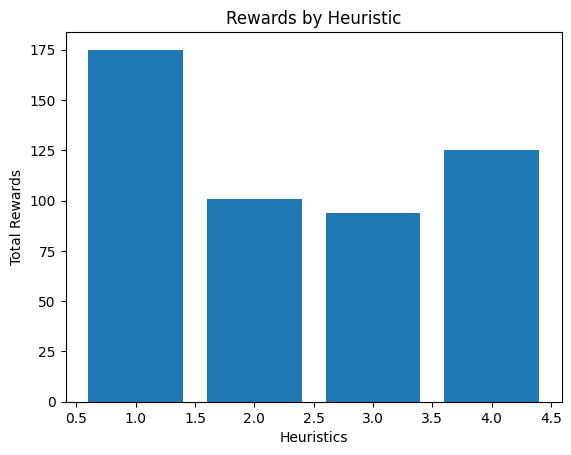

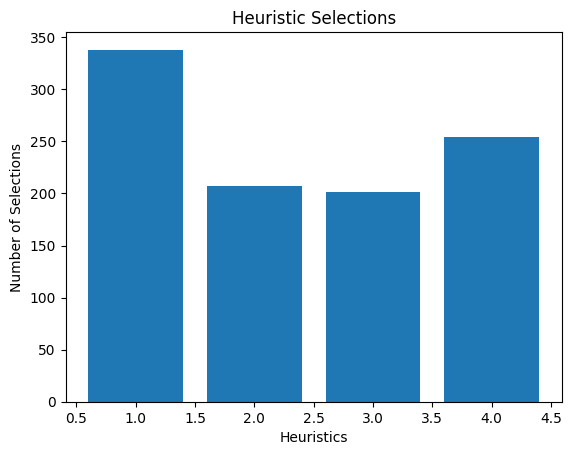

Total Rewards by UCB: 495
Heuristics Selected at Each Round by UCB: [0, 1, 2, 3, 0, 1, 2, 0, 0, 3, 1, 2, 3, 2, 3, 0, 2, 3, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 1, 3, 3, 0, 0, 0, 0, 0, 2, 3, 3, 1, 0, 2, 3, 3, 0, 0, 1, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 0, 3, 1, 1, 2, 0, 0, 1, 3, 3, 2, 0, 0, 3, 3, 3, 0, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 3, 0, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 1, 2, 2, 3, 3, 3, 3, 2, 2, 0, 2, 2, 3, 1, 1, 2, 2, 2, 0, 2, 2, 1, 3, 2, 0, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 1, 3, 2, 3, 0, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2

In [5]:
class BinPackerUCB:
    def __init__(self, data):
        self.data = data
        self.observations = len(data)
        self.num_heuristics = len(data.columns)
        self.num_selections = [0] * self.num_heuristics
        self.sum_rewards = [0] * self.num_heuristics
        self.heuristics_selected = []
        self.total_rewards = 0

    def ucb_select_heuristic(self, n):
        selected_heuristic = 0
        max_upper_bound = 0

        for i in range(self.num_heuristics):
            if self.num_selections[i] > 0:
                average_reward = self.sum_rewards[i] / self.num_selections[i]
                delta_i = math.sqrt(3/2 * math.log(n + 1) / self.num_selections[i])
                upper_bound = average_reward + delta_i
            else:
                upper_bound = 1e400

            if upper_bound > max_upper_bound:
                max_upper_bound = upper_bound
                selected_heuristic = i

        return selected_heuristic

    def run_ucb_algorithm(self):
        for n in range(self.observations):
            heuristic_index = self.ucb_select_heuristic(n)
            self.heuristics_selected.append(heuristic_index)
            self.num_selections[heuristic_index] += 1
            reward = self.data.values[n, heuristic_index]
            self.sum_rewards[heuristic_index] += reward
            self.total_rewards += reward

    def visualize_rewards(self):
        plt.bar(range(1, self.num_heuristics + 1), self.sum_rewards)
        plt.title('Rewards by Heuristic')
        plt.xlabel('Heuristics')
        plt.ylabel('Total Rewards')
        plt.show()

    def visualize_selections(self):
        plt.bar(range(1, self.num_heuristics + 1), self.num_selections)
        plt.title('Heuristic Selections')
        plt.xlabel('Heuristics')
        plt.ylabel('Number of Selections')
        plt.show()

# Load data (replace this with your dataset)
data = pd.read_csv("bin_packing_rewards_random.csv")

# Initialize and run UCB algorithm
ucb_bin_packer = BinPackerUCB(data)
ucb_bin_packer.run_ucb_algorithm()

# Visualize results
ucb_bin_packer.visualize_rewards()
ucb_bin_packer.visualize_selections()

print("Total Rewards by UCB:", ucb_bin_packer.total_rewards)
print("Heuristics Selected at Each Round by UCB:", ucb_bin_packer.heuristics_selected)


### Let's test now the UCB selection process with determined rewards
A rewards dataset is build based on performance results of each heuristic (execution time, number of bins and solution quality)

In [12]:
def generate_random_dataset(num_instances):
    """
    Generate a random bin packing dataset with specified number of heuristic algorithms.

    Parameters:
        num_instances (int): Number of heuristic algorithms to generate.

    Returns:
        pd.DataFrame: DataFrame containing the random bin packing dataset.
    """
    # Generate random values for num_bins_used, execution_time, and solution_quality
    num_bins_used = np.random.randint(5, 20, size=num_instances)
    execution_time = np.random.uniform(0.1, 10.0, size=num_instances)
    solution_quality = np.random.randint(-5, 5, size=num_instances)  # Optimality difference

    # Create DataFrame
    df = pd.DataFrame({
        'num_bins_used': num_bins_used,
        'execution_time': execution_time,
        'solution_quality': solution_quality
    })

    return df

# Example usage
num_instances = 4  # Number of tested heuristics
dataset = generate_random_dataset(num_instances)

# Save dataset to CSV
dataset.to_csv("bin_packing_dataset.csv", index=False)
dataset

,num_bins_used,execution_time,solution_quality
0,6,7.482768,-1
1,14,4.425342,-2
2,11,4.012636,1
3,14,6.362661,0


In [13]:
# Define rewards function
def calculate_reward(execution_time, num_bins_used, solution_quality):
    # Normalize metrics (e.g., between 0 and 1)
    #normalized_execution_time = (max_execution_time - execution_time) / max_execution_time
    #normalized_num_bins_used = (max_num_bins - num_bins_used) / max_num_bins
    #normalized_solution_quality = (max_solution_quality - solution_quality) / max_solution_quality

    # Assign rewards based on normalized metrics
    # Min execution_time and Min |solution_quality| => best reward
    #reward = alpha * normalized_execution_time + beta * normalized_num_bins_used + gamma * normalized_solution_quality
    #reward =  (alpha * normalized_execution_time + gamma * math.fabs(normalized_solution_quality))
    reward = 1 / (alpha * execution_time + gamma * math.fabs(solution_quality))
    return reward

# Define maximum values for normalization
max_execution_time = 10.0  # Adjust as per your dataset
max_num_bins = 20  # Adjust as per your dataset
max_solution_quality = 5  # Adjust as per your dataset

# Define weights for combining metrics
alpha = 0.5  # Weight for execution time
#beta = 0.3  # Weight for number of bins used
gamma = 0.5  # Weight for solution quality

# Generate random dataset
#num_instances = 1000  # Number of benchmark instances
#dataset = generate_random_dataset(num_instances)

# Calculate rewards for each benchmark instance
rewards = []
for index, row in dataset.iterrows():
    reward = calculate_reward(row['execution_time'], row['num_bins_used'], row['solution_quality'])
    rewards.append(reward)

# Add rewards to the dataset
dataset['reward'] = rewards

# Save the dataset with rewards to a CSV file
dataset.to_csv("bin_packing_rewards.csv", index=False)
dataset

,num_bins_used,execution_time,solution_quality,reward
0,6,7.482768,-1,0.235772
1,14,4.425342,-2,0.311267
2,11,4.012636,1,0.398992
3,14,6.362661,0,0.314334


In [14]:
# Define parameters
num_observations = 1000
num_heuristics = len(rewards)  # Adjust based on the number of bin packing algorithms you want to include

# Generate synthetic data
#data = np.random.randint(0, 2, size=(num_observations, num_heuristics))  # Example: Random rewards between 0 and 100
#data = np.random.choice([-1, 0, 1], size=(num_observations, num_heuristics))  # Randomly select from -1, 0, 1

# Convert rewards list to a list of lists with each reward in a separate sublist
rewards_2d = [[reward] for reward in rewards]

# Create DataFrame
#df = pd.DataFrame(data , columns=[f"Heuristic_{i+1}" for i in range(num_heuristics)])
df = pd.DataFrame(rewards_2d).T  # Transpose the rewards_2d list
df.columns = [f"Heuristic_{i+1}" for i in range(num_heuristics)]


# Save data to CSV file
df.to_csv("bin_packing_rewards.csv", index=False)
df

,Heuristic_1,Heuristic_2,Heuristic_3,Heuristic_4
0,0.235772,0.311267,0.398992,0.314334


### UCB Applied to BPP-1D
Getting finally to the main problem, we will be using UCB to select 4 heuristics (first fit, best fit, next fit, worst fit) accross different items, using pre-calculated rewards "**bin_packing_rewards.csv**".

Once the bin packing heuristics are first defined, then the selections and rewards are initialized from the data. At each iteration, the UCB for each heuristic is calculated, and the one with the highest UCB value is selected and applied to the current item, updating the bins. The reward is then calculated based on the number of bins used, and the number of selections as well as the cumulative rewards for the selected heuristic are updated. These steps are repeated until all items are placed.

Finally, the solution is analyzed in terms of the total number of bins used and the accumulated rewards.

In [15]:
# Définition des heuristiques de bin packing
def first_fit(bins, item, bin_capacity):
    for b in bins:
        if sum(b) + item <= bin_capacity:
            b.append(item)
            return bins
    bins.append([item])
    return bins

def best_fit(bins, item, bin_capacity):
    best_bin_index = None
    min_space_left = bin_capacity
    for i, b in enumerate(bins):
        space_left = bin_capacity - sum(b)
        if space_left >= item and space_left < min_space_left:
            best_bin_index = i
            min_space_left = space_left
    if best_bin_index is not None:
        bins[best_bin_index].append(item)
    else:
        bins.append([item])
    return bins

def next_fit(bins, item, bin_capacity):
    if len(bins) == 0 or sum(bins[-1]) + item > bin_capacity:
        bins.append([item])
    else:
        bins[-1].append(item)
    return bins

def worst_fit(bins, item, bin_capacity):
    worst_bin_index = None
    max_space_left = -1
    for i, b in enumerate(bins):
        space_left = bin_capacity - sum(b)
        if space_left >= item and space_left > max_space_left:
            worst_bin_index = i
            max_space_left = space_left
    if worst_bin_index is not None:
        bins[worst_bin_index].append(item)
    else:
        bins.append([item])
    return bins

class BinPackerUCB:
    def __init__(self, data, items, bin_capacity):
        self.data = data
        self.items = items
        self.bin_capacity = bin_capacity
        self.observations = len(items)
        self.num_heuristics = len(data.columns)
        self.num_selections = [0] * self.num_heuristics
        self.sum_rewards = [0] * self.num_heuristics
        self.heuristics_selected = []
        self.total_rewards = 0

    def ucb_select_heuristic(self, n):
        selected_heuristic = 0
        max_upper_bound = 0
        for i in range(self.num_heuristics):
            if self.num_selections[i] > 0:
                average_reward = self.sum_rewards[i] / self.num_selections[i]
                delta_i = math.sqrt(3/2 * math.log(n + 1) / self.num_selections[i])
                upper_bound = average_reward + delta_i
            else:
                upper_bound = 1e400
            if upper_bound > max_upper_bound:
                max_upper_bound = upper_bound
                selected_heuristic = i
        return selected_heuristic

    def apply_heuristic(self, heuristic_index, bins, item):
        if heuristic_index == 0:
            return first_fit(bins, item, self.bin_capacity)
        elif heuristic_index == 1:
            return best_fit(bins, item, self.bin_capacity)
        elif heuristic_index == 2:
            return next_fit(bins, item, self.bin_capacity)
        elif heuristic_index == 3:
            return worst_fit(bins, item, self.bin_capacity)
        else:
            raise ValueError("Heuristic index out of range")

    def run_ucb_algorithm(self):
        bins = []
        for n, item in enumerate(self.items):
            heuristic_index = self.ucb_select_heuristic(n)
            bins = self.apply_heuristic(heuristic_index, bins, item)
            print(f"Iteration {n+1}, Item {item}, Heuristic {heuristic_index + 1}, Bins: {bins}")

            # Simulate reward as inverse of the number of bins used (simplified reward function)
            reward = 1 / len(bins)

            self.heuristics_selected.append(heuristic_index)
            self.num_selections[heuristic_index] += 1
            self.sum_rewards[heuristic_index] += reward
            self.total_rewards += reward

        print(f"Final solution: {bins}")
        print(f"Total bins used: {len(bins)}")
        print(f"Total rewards: {self.total_rewards}")

# Exemple d'utilisation
if __name__ == "__main__":
    data = pd.read_csv("bin_packing_rewards.csv")
    items = [4, 8, 1, 4, 2, 1, 3, 8, 5, 7, 6, 4, 9, 3]  # Exemples d'items
    bin_capacity = 10

    bin_packer_ucb = BinPackerUCB(data, items, bin_capacity)
    bin_packer_ucb.run_ucb_algorithm()


Iteration 1, Item 4, Heuristic 1, Bins: [[4]]
Iteration 2, Item 8, Heuristic 2, Bins: [[4], [8]]
Iteration 3, Item 1, Heuristic 3, Bins: [[4], [8, 1]]
Iteration 4, Item 4, Heuristic 4, Bins: [[4, 4], [8, 1]]
Iteration 5, Item 2, Heuristic 1, Bins: [[4, 4, 2], [8, 1]]
Iteration 6, Item 1, Heuristic 2, Bins: [[4, 4, 2], [8, 1, 1]]
Iteration 7, Item 3, Heuristic 3, Bins: [[4, 4, 2], [8, 1, 1], [3]]
Iteration 8, Item 8, Heuristic 4, Bins: [[4, 4, 2], [8, 1, 1], [3], [8]]
Iteration 9, Item 5, Heuristic 1, Bins: [[4, 4, 2], [8, 1, 1], [3, 5], [8]]
Iteration 10, Item 7, Heuristic 2, Bins: [[4, 4, 2], [8, 1, 1], [3, 5], [8], [7]]
Iteration 11, Item 6, Heuristic 3, Bins: [[4, 4, 2], [8, 1, 1], [3, 5], [8], [7], [6]]
Iteration 12, Item 4, Heuristic 4, Bins: [[4, 4, 2], [8, 1, 1], [3, 5], [8], [7], [6, 4]]
Iteration 13, Item 9, Heuristic 1, Bins: [[4, 4, 2], [8, 1, 1], [3, 5], [8], [7], [6, 4], [9]]
Iteration 14, Item 3, Heuristic 2, Bins: [[4, 4, 2], [8, 1, 1], [3, 5], [8], [7, 3], [6, 4], [9]]


### Updating rewards using UCB and Epsilon-greedy:

Epsilon-greedy exploration, when combined with UCB, aims to strike a balance between exploiting the currently most promising heuristic (based on UCB calculations) and exploring other, potentially better heuristics that haven't been used as often => escaping from a local optima. Here's how it works:

- **UCB Calculation**: The algorithm still calculates the UCB value for each heuristic, indicating its estimated reward based on past performance.
- **Epsilon-greedy**: With a predefined probability (*epsilon*), the algorithm chooses a heuristic randomly. This is the exploration phase, where it ventures beyond the current "best" option to discover potentially even better choices.
With a probability of *1 - epsilon*, the algorithm selects the heuristic with the highest UCB value. This is the exploitation phase, where it leverages the knowledge gained from past selections.

In [16]:
# Définition des heuristiques de bin packing
def first_fit(bins, item, bin_capacity):
    for b in bins:
        if sum(b) + item <= bin_capacity:
            b.append(item)
            return bins
    bins.append([item])
    return bins

def best_fit(bins, item, bin_capacity):
    best_bin_index = None
    min_space_left = bin_capacity
    for i, b in enumerate(bins):
        space_left = bin_capacity - sum(b)
        if space_left >= item and space_left < min_space_left:
            best_bin_index = i
            min_space_left = space_left
    if best_bin_index is not None:
        bins[best_bin_index].append(item)
    else:
        bins.append([item])
    return bins

def next_fit(bins, item, bin_capacity):
    if len(bins) == 0 or sum(bins[-1]) + item > bin_capacity:
        bins.append([item])
    else:
        bins[-1].append(item)
    return bins

def worst_fit(bins, item, bin_capacity):
    worst_bin_index = None
    max_space_left = -1
    for i, b in enumerate(bins):
        space_left = bin_capacity - sum(b)
        if space_left >= item and space_left > max_space_left:
            worst_bin_index = i
            max_space_left = space_left
    if worst_bin_index is not None:
        bins[worst_bin_index].append(item)
    else:
        bins.append([item])
    return bins

class BinPackerUCB:
    def __init__(self, data, items, bin_capacity):
        self.data = data
        self.items = items
        self.bin_capacity = bin_capacity
        self.observations = len(items)
        self.num_heuristics = len(data.columns)
        self.num_selections = [0] * self.num_heuristics
        self.sum_rewards = [0] * self.num_heuristics
        self.heuristics_selected = []
        self.total_rewards = 0
        self.epsilon = 0.1

    def ucb_select_heuristic(self, n):
        selected_heuristic = 0
        max_upper_bound = 0
        for i in range(self.num_heuristics):
            self.sum_rewards[i] = 0  # Reset sum_rewards to 0 at each iteration

            if random.random() < self.epsilon:  # Epsilon-greedy exploration
              selected_heuristic = i
              break  # Exit the loop if exploration is chosen

            if self.num_selections[i] > 0:
                average_reward = self.sum_rewards[i] / self.num_selections[i]
                delta_i = math.sqrt(3/2 * math.log(n + 1) / self.num_selections[i])
                upper_bound = average_reward + delta_i
            else:
                upper_bound = 1e400
            #print(f"heuristic{i+1} with ucb= {upper_bound}")
            if upper_bound > max_upper_bound:
                max_upper_bound = upper_bound
                selected_heuristic = i
        #print(f"selected= {selected_heuristic+1} with ucb= {max_upper_bound}")
        return selected_heuristic

    def apply_heuristic(self, heuristic_index, bins, item):
        if heuristic_index == 0:
            return first_fit(bins, item, self.bin_capacity)
        elif heuristic_index == 1:
            return best_fit(bins, item, self.bin_capacity)
        elif heuristic_index == 2:
            return next_fit(bins, item, self.bin_capacity)
        elif heuristic_index == 3:
            return worst_fit(bins, item, self.bin_capacity)
        else:
            raise ValueError("Heuristic index out of range")

    def run_ucb_algorithm(self):
        bins = []
        for n, item in enumerate(self.items):
            heuristic_index = self.ucb_select_heuristic(n)
            bins = self.apply_heuristic(heuristic_index, bins, item)
            print(f"\nIteration {n+1}, Item {item}, Heuristic {heuristic_index + 1}, Bins: {bins}")

            # Simulate reward as inverse of the number of bins used (simplified reward function)
            reward = 1 / len(bins)

            self.heuristics_selected.append(heuristic_index+1)
            self.num_selections[heuristic_index] += 1
            self.sum_rewards[heuristic_index] += reward
            self.total_rewards += reward

            # Update the rewards table
            self.update_rewards_table(heuristic_index, reward)

        print("\n___________________________")
        print(f"Selected heuristics: {self.heuristics_selected}")
        print(f"Final solution: {bins}")
        print(f"Total bins used: {len(bins)}")
        print(f"Total rewards: {self.total_rewards}")
        print(f"Rewards table track: \n{self.data}")

    def update_rewards_table(self, heuristic_index, reward):
        # Add the new reward to the data DataFrame
        new_rewards = self.data.iloc[-1].copy()  # Get the last row of rewards
        new_rewards[heuristic_index] += reward
        new_rewards_df = pd.DataFrame([new_rewards])
        print(f"new_rewards for heuristic {heuristic_index+1}: {reward}")
        self.data = pd.concat([self.data, new_rewards_df], ignore_index=True)  # Use concat instead of append

# Test Example
if __name__ == "__main__":
    data = pd.read_csv("bin_packing_rewards.csv")
    print("____ INIT ____\n",data)
    items = [4, 8, 1, 4, 2, 1, 3, 8, 5, 7, 6, 4, 9, 3]  # Exemples d'items
    bin_capacity = 10

    bin_packer_ucb = BinPackerUCB(data, items, bin_capacity)
    bin_packer_ucb.run_ucb_algorithm()

____ INIT ____
    Heuristic_1  Heuristic_2  Heuristic_3  Heuristic_4
0     0.235772     0.311267     0.398992     0.314334

Iteration 1, Item 4, Heuristic 1, Bins: [[4]]
new_rewards for heuristic 1: 1.0

Iteration 2, Item 8, Heuristic 1, Bins: [[4], [8]]
new_rewards for heuristic 1: 0.5

Iteration 3, Item 1, Heuristic 1, Bins: [[4, 1], [8]]
new_rewards for heuristic 1: 0.5

Iteration 4, Item 4, Heuristic 2, Bins: [[4, 1, 4], [8]]
new_rewards for heuristic 2: 0.5

Iteration 5, Item 2, Heuristic 3, Bins: [[4, 1, 4], [8, 2]]
new_rewards for heuristic 3: 0.5

Iteration 6, Item 1, Heuristic 4, Bins: [[4, 1, 4, 1], [8, 2]]
new_rewards for heuristic 4: 0.5

Iteration 7, Item 3, Heuristic 2, Bins: [[4, 1, 4, 1], [8, 2], [3]]
new_rewards for heuristic 2: 0.3333333333333333

Iteration 8, Item 8, Heuristic 3, Bins: [[4, 1, 4, 1], [8, 2], [3], [8]]
new_rewards for heuristic 3: 0.25

Iteration 9, Item 5, Heuristic 4, Bins: [[4, 1, 4, 1], [8, 2], [3, 5], [8]]
new_rewards for heuristic 4: 0.25

Iter

### Benchmark Testing:

In [27]:
# Testing over 100 items
import time

data = pd.read_csv("bin_packing_rewards.csv")
print("____ INIT ____\n",data)
items = weights  # Exemples d'items
bin_capacity = total_capacity

start = time.time()
bin_packer_ucb = BinPackerUCB(data, items, bin_capacity)
bin_packer_ucb.run_ucb_algorithm()
end = time.time()
print("\nExecution time = ", end-start)

____ INIT ____
    Heuristic_1  Heuristic_2  Heuristic_3  Heuristic_4
0     0.235772     0.311267     0.398992     0.314334

Iteration 1, Item 69, Heuristic 1, Bins: [[69]]
new_rewards for heuristic 1: 1.0

Iteration 2, Item 69, Heuristic 2, Bins: [[69], [69]]
new_rewards for heuristic 2: 0.5

Iteration 3, Item 69, Heuristic 3, Bins: [[69], [69], [69]]
new_rewards for heuristic 3: 0.3333333333333333

Iteration 4, Item 67, Heuristic 2, Bins: [[69], [69], [69], [67]]
new_rewards for heuristic 2: 0.25

Iteration 5, Item 67, Heuristic 1, Bins: [[69], [69], [69], [67], [67]]
new_rewards for heuristic 1: 0.2

Iteration 6, Item 67, Heuristic 4, Bins: [[69], [69], [69], [67], [67], [67]]
new_rewards for heuristic 4: 0.16666666666666666

Iteration 7, Item 67, Heuristic 3, Bins: [[69], [69], [69], [67], [67], [67], [67]]
new_rewards for heuristic 3: 0.14285714285714285

Iteration 8, Item 67, Heuristic 3, Bins: [[69], [69], [69], [67], [67], [67], [67], [67]]
new_rewards for heuristic 3: 0.125

I